In [1]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
from utils import *
from models.models import *
from data.mnist import mnist_dataloaders
import torch.optim as optim
from tqdm import tqdm

In [2]:
ensure_reproducibility(42)

Visualize the snake activation function at different values of <i>a</i>

In [3]:
def visualize_snake(lower_lim=-2, upper_lim=2, a_values=[1, 0.2, 5]):
    x = torch.arange(-2, 2, 0.1)
    for a in a_values:
        plt.plot(x, snake_func(x, a), label="a = "+str(a))
    plt.legend()
    plt.show()

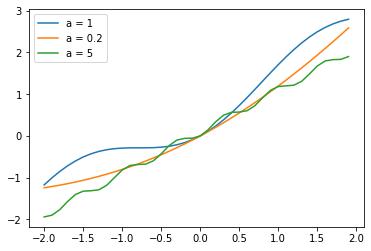

In [4]:
visualize_snake()

In [5]:
sin_inputs, sin_outputs = gen_func_dataset(lower_limit=-20, upper_limit=20, func="sin")
sample_inputs1, sample_outputs1 = sample_func_dataset(dataset_inputs=sin_inputs, dataset_outputs=sin_outputs, lower_lim=-5, upper_lim=-1, num_points=50)
sample_inputs2, sample_outputs2 = sample_func_dataset(dataset_inputs=sin_inputs, dataset_outputs=sin_outputs, lower_lim=1, upper_lim=5, num_points=50)
sample_inputs = torch.cat((sample_inputs1, sample_inputs2))
sample_outputs = torch.cat((sample_outputs1, sample_outputs2))

Configuration for the extrapolation experiment with snake

In [6]:
ARCHITECTURE = (1, 512, 1)
EPOCHS = 1000
activation = "snake_a=10"

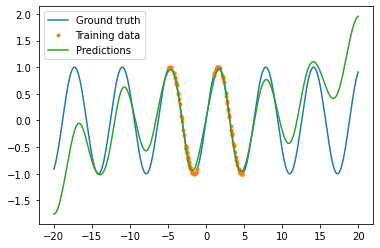

In [7]:
model = SimpleMLP(ARCHITECTURE, activation)

model, _ = train_extrapolation(model, sample_inputs, sample_outputs, epochs=EPOCHS, verbose=False)
with torch.no_grad():
    model.cpu()
    preds = model(sin_inputs)

plt.plot(sin_inputs, sin_outputs, label="Ground truth")
plt.plot(sample_inputs, sample_outputs, '.', label="Training data")
plt.plot(sin_inputs, preds, label="Predictions")
plt.legend()

Configuration for the MNIST experiment

In [8]:
ARCHITECTURE = (28*28, 512, 512, 512, 10)
EPOCHS = 50
BATCH_SIZE = 32

Training on MNIST with ReLU activation
Training on MNIST with sin(x) activation
Training on MNIST with x + sin(x) activation
Training on MNIST with x + sin²x activation


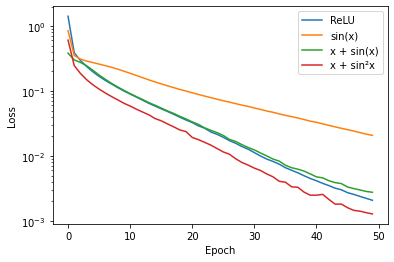

In [9]:
train_mnist_dataloader, _ = mnist_dataloaders(batch_size=BATCH_SIZE)
activations = ["relu", "sin", "x_sin", "snake_a=1"]
labels = ["ReLU", "sin(x)", "x + sin(x)", "x + sin\u00b2x"]
plt.yscale("log")
for activation, label in zip(activations, labels):
    print(f"Training on MNIST with {label} activation")
    model = SimpleMLP(ARCHITECTURE, activation)
    model, losses = train_mnist(model, train_mnist_dataloader, epochs=EPOCHS, verbose=False)
    plt.plot(losses, label=label)
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()